# Exploratory Data Analysis

Here we try to answer the questions asked before:

* Wich account gets more favs/retweets? 
* What tweets achieve more repercussion?
* What are the main complaints from users?
* From which country are there the most complaints?
* What time are there more complaints?
* How do people respond to each product?
* Are there more positive or negative tweets?

## Importing packages

In [1]:
import os
import tweepy as tw
import pandas as pd
import seaborn as sns
import numpy as np

## Importing datasets

In [2]:
df = pd.read_csv("_dataframes/df_clean.csv")
df_ml = pd.read_csv("_dataframes/df_ml_clean.csv")
df_argentina = pd.read_csv("_dataframes/df_argentina_clean.csv")
df_mexico = pd.read_csv("_dataframes/df_mexico_clean.csv")
df_venezuela = pd.read_csv("_dataframes/df_venezuela_clean.csv")
df_ayuda = pd.read_csv("_dataframes/df_ayuda_clean.csv")

## Questions

Previously, we define some variables to use in the following statements.

In [3]:
parts = {"df": df, 
         "df_ml": df_ml, 
         "df_argentina": df_argentina, 
         "df_mexico": df_mexico, 
         "df_venezuela": df_venezuela, 
         "df_ayuda": df_ayuda}

### Q1: Amount of tweets per account

Here we get how many tweets each account published. 

[Text(0, 0.5, 'Amount of Tweets'),
 Text(0.5, 0, 'Account'),
 Text(0.5, 1.0, 'Account vs #Tweets')]

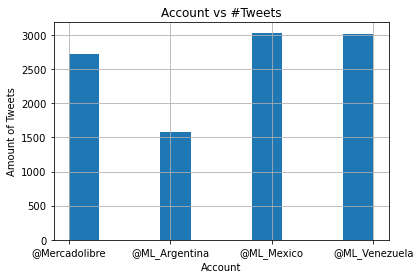

In [4]:
df['Account'].hist(bins=10).set(xlabel="Account", ylabel = "Amount of Tweets", title="Account vs #Tweets")

### Q2: Amount of tweets per account per year

Here we group the dataframe by account and by year. Then we count the amount of tweets for each category and plot it. We can see that before there were more tweets than today.

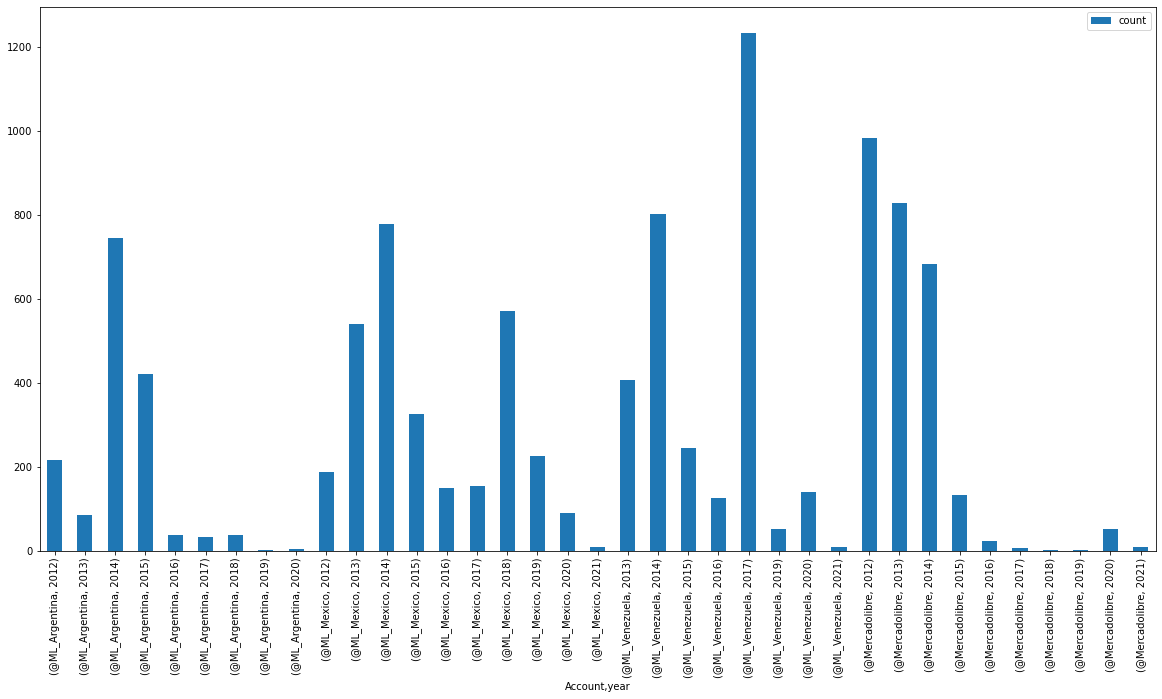

In [5]:
df.groupby(['Account', 'year']).agg(['count'])["id"].plot.bar(figsize=(20,10))

### Q3: Favs and retweets per year

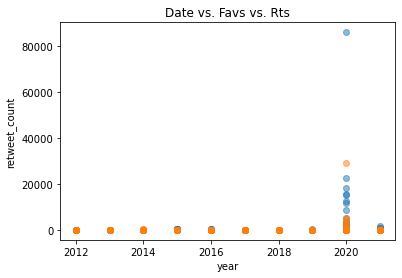

In [6]:
date = df["year"]
favs = df["favorite_count"]
rts = df["retweet_count"]

sns.regplot(x=date, y=favs, fit_reg=False, scatter_kws={"alpha": 0.5}).set_title("Date vs. Favs vs. Rts")
sns.regplot(x=date, y=rts, fit_reg=False, scatter_kws={"alpha": 0.5})

2020 was a great year in terms of impact. We can see several tweets with a number of favs/rts above the median. In 2021 it seems to have the same trend as in 2020, even with 11 month to go, it already has tweets with more impact than the most years before.

### Q4: Distribution of favs and rts

First, we create a new column called Max_Rt_Fav with the max value between fav and retweet. Then, depending on this value, each tweet belongs to a certain level of repercussion (1 to 7, from low to high):

* Level 1: less than 20 fav/rts
* Level 2: between 20 and 50 favs/rts
* Level 3: between 50 and 100 favs/rts
* Level 4 between 100 and 500 favs/rts
* Level 5: between 500 and 3000 favs/rts
* Level 6: between 3000 and 10000 favs/rts
* Level 7: more than 10000 favs/rts

In [7]:
df["Max_Rt_Fav"] = df[['favorite_count','retweet_count']].max(axis=1)

df.loc[(df["Max_Rt_Fav"] <= 20), "Max_Rt_Fav"] = 1

df.loc[(df["Max_Rt_Fav"] > 20) & (df["Max_Rt_Fav"] <= 50), "Max_Rt_Fav"] = 2

df.loc[(df["Max_Rt_Fav"] > 50) & (df["Max_Rt_Fav"] <= 100), "Max_Rt_Fav"] = 3

df.loc[(df["Max_Rt_Fav"] > 100) & (df["Max_Rt_Fav"] <= 500), "Max_Rt_Fav"] = 4

df.loc[(df["Max_Rt_Fav"] > 500) & (df["Max_Rt_Fav"] <= 3000), "Max_Rt_Fav"] = 5
       
df.loc[(df["Max_Rt_Fav"] > 3000) & (df["Max_Rt_Fav"] <= 10000), "Max_Rt_Fav"] = 6
       
df.loc[(df["Max_Rt_Fav"] > 10000), "Max_Rt_Fav"] = 7

df.rename(columns={'Max_Rt_Fav': 'repercussion_level'}, inplace=True)
df = df.drop(['retweet_count', "favorite_count"], 1)

df.to_csv('_dataframes/df_level.csv',index=False)

df.head(5)


,Account,id,created_at,text,year,month,day,hour,repercussion_level
0,@Mercadolibre,1357071365279371265,2021-02-03 21:00:01,En 2020 incorporamos un promedio de 40 emplead...,2021,2,3,21,5
1,@Mercadolibre,1356708979716538373,2021-02-02 21:00:01,Salvaje usa nuestra caja para dormir la siesta...,2021,2,2,21,5
2,@Mercadolibre,1355259421975187456,2021-01-29 21:00:00,"Día a día, más de 80 mil pymes argentinas vend...",2021,1,29,21,5
3,@Mercadolibre,1354564846574948352,2021-01-27 23:00:00,¿Sabías que más de la mitad de las compras se ...,2021,1,27,23,4
4,@Mercadolibre,1351908706057912320,2021-01-20 15:05:27,"Conocé la historia de Nouvelle Factory, una py...",2021,1,20,15,3


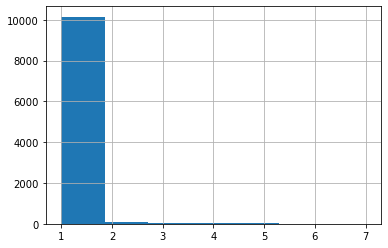

In [8]:
df["repercussion_level"].hist(bins=7)

Almost 98% of tweets are Level 1 (it means that they had neither more than 20 rts nor more than 20 favs).
 ).  

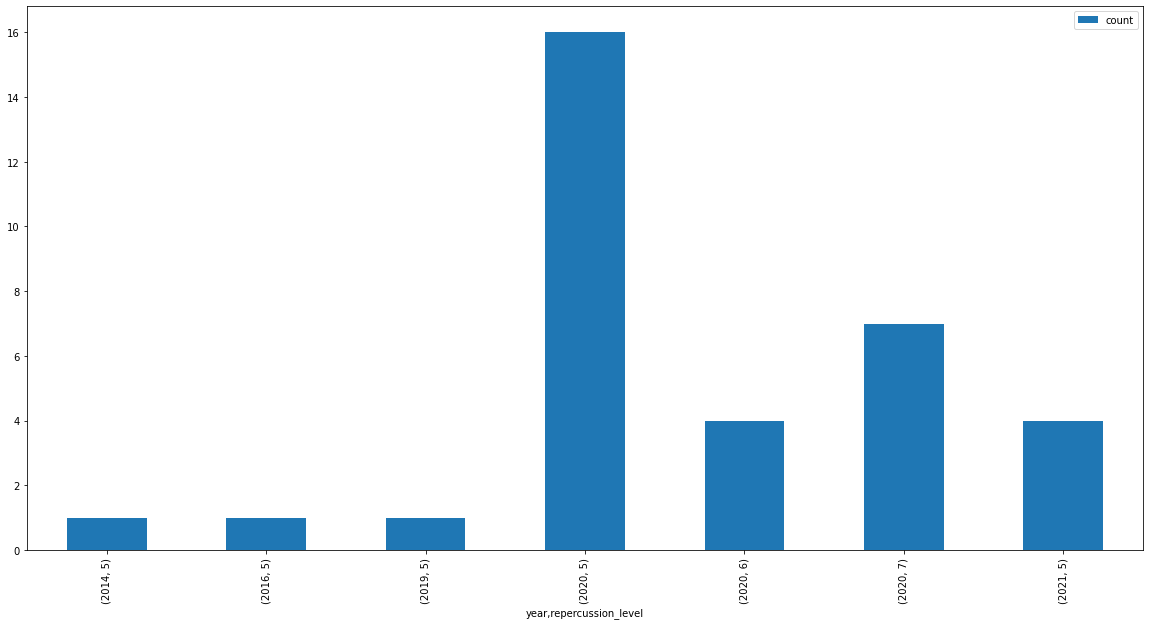

In [9]:
df[df["repercussion_level"]>4].groupby(['year', 'repercussion_level']).agg(['count'])["id"].plot.bar(figsize=(20,10))

Here we have a very good appreciation. As we saw before, over the years the accounts began to tweet less, but as we see in this graph, they had tweets with a higher level of impact, despite having much fewer tweets.


### Q5: Tweets with max favs/rts

We filter tweets with level of repercussion more or equal than 5.

In [15]:
favorite_median = df.median()
retweet_median = df.median()

max_repercu = df.loc[df['repercussion_level']>4]

max_repercu


,Account,id,created_at,text,year,month,day,hour,repercussion_level
0,@Mercadolibre,1357071365279371265,2021-02-03 21:00:01,En 2020 incorporamos un promedio de 40 emplead...,2021,2,3,21,5
1,@Mercadolibre,1356708979716538373,2021-02-02 21:00:01,Salvaje usa nuestra caja para dormir la siesta...,2021,2,2,21,5
2,@Mercadolibre,1355259421975187456,2021-01-29 21:00:00,"Día a día, más de 80 mil pymes argentinas vend...",2021,1,29,21,5
5,@Mercadolibre,1349823669456003073,2021-01-14 21:00:15,Estamos convencidos de la importancia de traba...,2021,1,14,21,5
11,@Mercadolibre,1339631456059072512,2020-12-17 18:00:02,¡Sumamos más de 70 nuevas vans y ya tenemos un...,2020,12,17,18,6
13,@Mercadolibre,1334907894148558849,2020-12-04 17:10:18,Hoy lanzamos el programa Certified Tech Develo...,2020,12,4,17,5
20,@Mercadolibre,1321225164487446528,2020-10-27 23:00:01,Dinamo es un proyecto de dos amigos que se con...,2020,10,27,23,5
26,@Mercadolibre,1316153375210311681,2020-10-13 23:06:32,¡Estamos muy contentos! Fuimos elegidos entre ...,2020,10,13,23,6
32,@Mercadolibre,1311061057616711683,2020-09-29 21:51:29,"Durante estos últimos meses, muchas personas t...",2020,9,29,21,5
33,@Mercadolibre,1308518425015341056,2020-09-22 21:27:58,Detrás de cada compra que hacés en nuestra pla...,2020,9,22,21,6
